In [2]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
from datetime import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\database_workspace'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\database_workspace\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\database_workspace\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")

In [3]:
# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    
    


In [26]:
def takeSecond(elem):
    return elem[1]

def retrieve_low_nodes(TS, sel_days, index, sel_num):
    dl_rank = []
    for code in list(TS.keys()):
        dl_rank.append((code, TS[code][sel_days[index]]['dl']))
        
        dl_rank.sort(key=takeSecond)    
    low = dl_rank[0:sel_num]
    return [j[0] for j in low]
        
def double_low_profit(TS, days, start_id, gap, sel_num, step, end_id = 2000):
    profit = []
    sum_dl = 0
    sel_days = days[start_id:end_id:step]
    all_codes = []
    res = []
    
    for i in range(len(sel_days)):  
        curr_dl_codes = retrieve_low_nodes(TS, sel_days, i, sel_num)
        all_codes.append(curr_dl_codes)
        if i >= gap:
        
            tw = 0
            lw = 0
            for cd in all_codes[i-gap]:
                tw += TS[cd][sel_days[i]]['dp']
        
        
            for cd in all_codes[i-gap]:
                lw += TS[cd][sel_days[i-gap]]['dp']
        
            re = ((tw - lw)/ lw)
            res.append(re)
            sum_dl += re
        
            profit.append(sum_dl)
    return profit, sel_days, res


def plot_str(start_id, sel_days, gap, step, profit,tick_spacing = 60):
    plt.figure()
    tick_spacing = tick_spacing
    fig, ax = plt.subplots(1,1)
    plt.plot(sel_days, profit)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')
    plt.show()
    
def win_rt(res):
    print("Max profit", max(res))
    print("Max loss", min(res))
    wins = []
    win = 0
    for i in res:
        if i >= 0:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
    win_rate = win/len(res)
    print("rate of wins", win_rate)
    print("stat for each point", wins)

In [16]:
print(DTBS['D']['mon'][46])
print(DTBS['D']['mon'][92])
print(DTBS['D']['mon'][142])
print(DTBS['D']['mon'][190])
print(DTBS['D']['mon'][236])
print(DTBS['D']['mon'][282])

2018-01-08
2019-01-07
2020-01-06
2021-01-04
2022-01-10
2023-01-09


<Figure size 432x288 with 0 Axes>

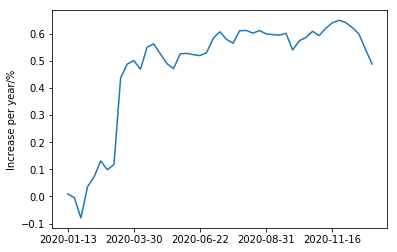

2020-12-28
0.009578013950158842 0.4883149535497349
Max profit 0.3179722537665695
Max loss -0.07497133337660365
rate of wins 0.5319148936170213
stat for each point [True, False, False, True, True, True, False, True, True, True, True, False, True, True, False, False, False, True, True, False, False, True, True, True, False, False, True, True, False, True, False, False, False, True, False, True, True, True, False, True, True, True, False, False, False, False, False]


In [27]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 142
end_id = 190
gap = 1
step = 1
sel_num = 5
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])
win_rt(res)

<Figure size 432x288 with 0 Axes>

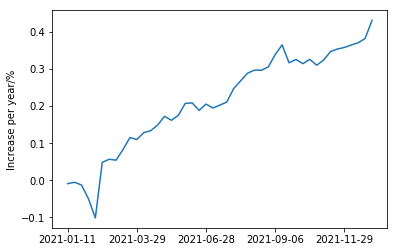

2021-12-27
-0.009365517606379381 0.4319866433180292
Max profit 0.15007050891986143
Max loss -0.05182416966412853
rate of wins 0.7111111111111111
stat for each point [False, True, False, False, False, True, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True]


In [28]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 190
end_id = 236
gap = 1
step = 1
sel_num = 5
profit, sel_days, res= double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])

win_rt(res)

<Figure size 432x288 with 0 Axes>

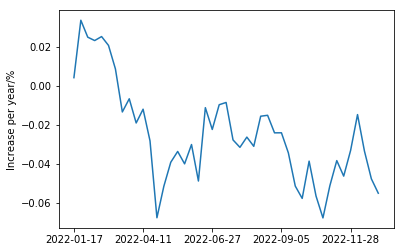

2022-12-26
0.004086559851984068 -0.05523299964577725
Max profit 0.037658692540753526
Max loss -0.03946346540787313
rate of wins 0.4666666666666667
stat for each point [True, True, False, False, True, False, False, False, True, False, True, False, False, True, True, True, False, True, False, True, False, True, True, False, False, True, False, True, True, False, True, False, False, False, True, False, False, True, True, False, True, True, False, False, False]


In [29]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 236
end_id = 282
gap = 1
step = 1
sel_num = 5
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])
win_rt(res)

<Figure size 432x288 with 0 Axes>

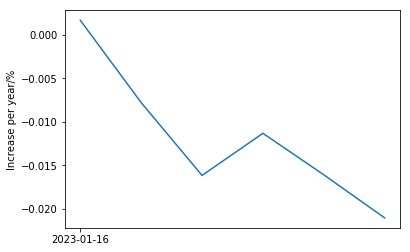

2023-02-27
0.0016504276710968253 -0.021034328390225798
Max profit 0.004831370345220532
Max loss -0.009449259584386034
rate of wins 0.3333333333333333
stat for each point [True, False, False, True, False, False]


In [30]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 282
end_id = 400
gap = 1
step = 1
sel_num = 5
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])
win_rt(res)

<Figure size 432x288 with 0 Axes>

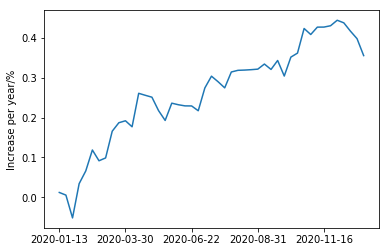

2020-12-28
0.01245723129793865 0.35507637999854835
Max profit 0.08567450366450088
Max loss -0.05712036327284686
rate of wins 0.5531914893617021
stat for each point [True, False, False, True, True, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, False, False, True, True, False, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False]


In [31]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 142
end_id = 190
gap = 1
step = 1
sel_num = 20
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])
win_rt(res)

<Figure size 432x288 with 0 Axes>

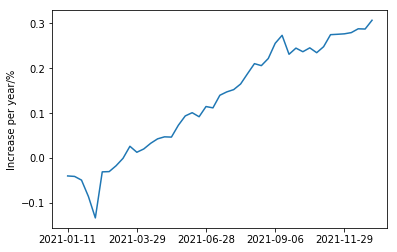

2021-12-27
-0.03970843310673688 0.3072485884340442
Max profit 0.10262339828645085
Max loss -0.047688734769191755
rate of wins 0.6888888888888889
stat for each point [False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, True, False, True, False, True, False, True, True, True, True, True, True, False, True]


In [32]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 190
end_id = 236
gap = 1
step = 1
sel_num = 20
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])
win_rt(res)

<Figure size 432x288 with 0 Axes>

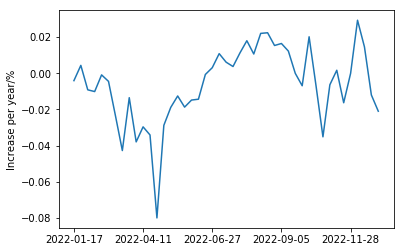

2022-12-26
-0.004088303459558242 -0.02101215259815424
Max profit 0.051274950973300835
Max loss -0.045938441348524144
rate of wins 0.4888888888888889
stat for each point [False, True, False, False, True, False, False, False, True, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, True, True, False, True, True, False, True, False, False, False, True, False, False, True, True, False, True, True, False, False, False]


In [33]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 236
end_id = 282
gap = 1
step = 1
sel_num = 20
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(sel_days[-1])
print(profit[0], profit[-1])
win_rt(res)

<Figure size 432x288 with 0 Axes>

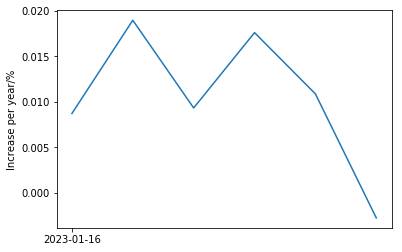

0.01898215781692339 -0.0027936476135809133
Max profit 0.010274438822994341
Max loss -0.01366231331388443
rate of wins 0.5
stat for each point [True, True, False, True, False, False]


In [34]:
days = DTBS['D']['mon']
TS = DTBS['A']
start_id = 282
end_id = 400
gap = 1
step = 1
sel_num = 20
profit, sel_days, res = double_low_profit(TS=TS, days=days, start_id=start_id, gap=gap, sel_num=sel_num, step=step, end_id = end_id)
plot_str(start_id=start_id, sel_days = sel_days[gap:], gap=gap, step=step, profit=profit, tick_spacing=10)
print(profit[1], profit[-1])
win_rt(res)